In [1]:
# IMPORTING LIBRARIES

In [2]:
import numpy as np # math part
import pandas as pd # frame works
import matplotlib.pyplot as mp # visualization
import seaborn as sb # advanced visualization
import warnings
warnings.filterwarnings("ignore")

In [3]:
# DATA LOADING AND EDA

In [4]:
ds = pd.read_csv(r"C:\REAL TIME PROJECTS\RETAIL PRICE OPTIMIZATION ML\retail_price.csv")

In [5]:
ds.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [6]:
ds.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [7]:
ds.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [8]:
ds.shape

(676, 30)

In [9]:
ds.dtypes # used to know the data type

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [10]:
ds.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [11]:
ds.nunique() # unique elements in every column

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [12]:
ds.sort_values("total_price",ascending = False).head(10)#us to sort the values
# by default it takes ascending order
# to view the 10 highest total_price

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
277,watches6,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000
175,computers6,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,...,149.000000,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
549,health2,health_beauty,01-08-2018,28,9240.00,20.505357,330.000000,60,2644,6,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
544,health2,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60,2644,6,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,325.000000
276,watches6,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
499,furniture2,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000
178,computers6,computers_accessories,01-05-2018,52,7794.80,18.943077,149.900000,48,894,1,...,119.000000,4.2,39.217200,149.900000,4.3,18.943077,79.800000,3.5,14.414545,149.900000
612,watches7,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000


In [13]:
ds.sort_values("total_price").head(10)
# to view the 10 lowest total_price

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
329,consoles2,consoles_games,01-07-2017,1,19.90,11.85,19.90,56,237,3,...,19.900000,4.2,13.473077,19.900000,3.9,11.850000,19.900000,3.9,11.850000,19.850000
281,cool3,cool_stuff,01-09-2017,1,29.50,11.73,29.50,57,787,8,...,99.990000,4.2,15.933333,29.500000,4.4,11.730000,29.500000,4.4,11.730000,29.450000
623,health4,health_beauty,01-10-2017,1,29.90,11.85,29.90,55,388,1,...,23.990000,4.3,13.136667,89.990000,4.1,16.562917,58.990000,3.9,19.065263,29.850000
336,consoles2,consoles_games,01-02-2018,1,32.50,11.85,32.50,56,237,3,...,32.500000,4.2,15.256000,32.500000,3.9,11.850000,32.500000,3.9,11.850000,27.033333
468,furniture3,furniture_decor,01-08-2018,1,35.00,19.44,35.00,41,789,1,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
41,consoles1,consoles_games,01-07-2018,1,36.20,22.18,36.20,49,100,4,...,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000
524,furniture1,furniture_decor,01-07-2017,1,38.40,7.78,38.40,49,829,1,...,75.000000,4.1,15.856000,38.400000,3.7,7.780000,38.400000,3.7,7.780000,38.350000
457,furniture3,furniture_decor,01-08-2017,1,38.40,11.85,38.40,41,789,1,...,75.000000,4.1,15.376923,38.400000,3.7,12.105000,38.400000,3.8,11.850000,38.350000
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.10,45.95,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
75,health9,health_beauty,01-08-2018,2,47.98,16.77,23.99,48,575,1,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,23.990000


In [14]:
# DATA PREPROCESSING

In [15]:
ds.isna().sum() # used to check the missing values 

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

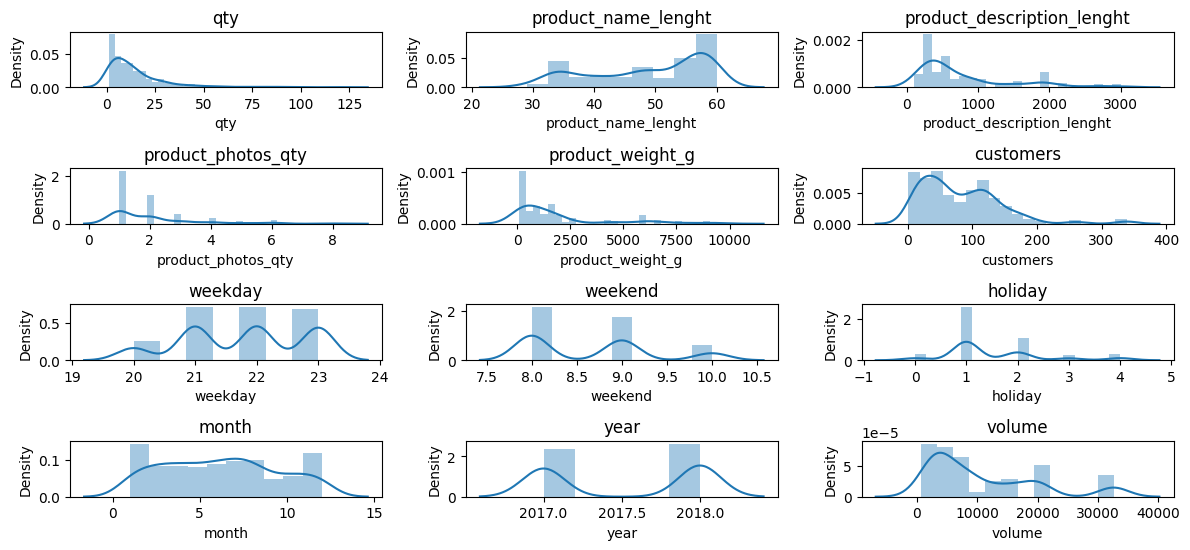

In [16]:
k=1
mp.figure(figsize=(12,12)) # it is the figure size

for i in ds.select_dtypes("int"): # selecting the columns with integer data type
    mp.subplot(9,3,k) # to divide the plot into subplots
    sb.distplot(ds[i]) # plot type
    mp.title(i) # to assign the column names as titles
    k+=1
    mp.tight_layout() # used to adjust the subplots to fit in the figsize

In [17]:
# ds_new = ds.copy() # copying the dataset to remove outliers and create a new data set

In [18]:
ds.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]) # to know the specified values

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
5%,1.000000,99.987500,10.978500,29.900000,33.000000,178.000000,1.000000,150.000000,3.700000,10.000000,...,23.397407,3.900000,6.810000,35.000000,3.700000,11.850000,35.000000,3.500000,11.850000,29.750000
10%,2.000000,154.700000,12.483421,36.527143,33.000000,236.000000,1.000000,200.000000,3.800000,17.000000,...,23.990000,3.900000,11.287368,38.400000,3.800000,12.720417,39.990000,3.800000,13.367000,38.350000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
35%,6.000000,490.670000,15.853265,59.900000,46.000000,363.000000,1.000000,444.000000,4.100000,43.000000,...,53.900000,4.100000,15.266667,59.900000,4.100000,15.894737,58.990000,3.900000,15.753047,59.900000
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
65%,14.000000,1337.655000,19.540750,105.000000,56.000000,735.000000,2.000000,1550.000000,4.200000,102.000000,...,89.900000,4.200000,18.327823,105.000000,4.200000,18.660143,83.833333,4.100000,18.281875,107.374656


In [19]:
ds.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [20]:
# CREATING A NEW DATA BY COPYING OLD DATA SET TO MAKE CHAINGES IN NEW DATA SET

In [21]:
ds_new = pd.DataFrame(ds) # copying the data set
ds_new.drop("product_id",axis=1,inplace=True) # removing the unwanted rows to avoid overfitting
ds_new.drop("product_name_lenght",axis=1,inplace=True)
ds_new.drop("product_description_lenght",axis=1,inplace=True)
ds_new.drop("product_photos_qty",axis=1,inplace=True)

In [22]:
ds_new.columns

Index(['product_category_name', 'month_year', 'qty', 'total_price',
       'freight_price', 'unit_price', 'product_weight_g', 'product_score',
       'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's',
       'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [23]:
outlier_list=[ds_new.columns] # making the list of the columns having outliers

In [24]:
# CHECKING FOR OUTLIERS
def outliers_train(ds_new): # here ds_new is the input
    q1,q2=np.percentile(ds_new,[10,90]) # here q1 = 10%, q2 = 90%
    ıqr=q2-q1 # it is the difference between q1 and q2
    low,high=q1-1.5*(ıqr),q2+1.5*(ıqr) # used to calculate lower bound and upper bound of the outlier 
    outliers_train=[i for i in ds_new if i<low or i>high] # to check outlier is in or out of bound
    return outliers_train

In [25]:
outliers_train(ds_new.qty) # to find the outliers of a selected column # qty has 9 outliers

[87, 91, 82, 85, 114, 76, 122, 83, 92]

In [26]:
outliers_train(ds_new.customers) # customers has np outliers

[]

In [27]:
outliers_train(ds_new.comp_1) # comp_1 has 3 outliers

[349.9, 349.9, 339.9]

In [28]:
outliers_train(ds_new.comp_2) # comp_3 has no outliers

[349.9, 349.9, 349.9, 339.0, 339.0, 346.158]

In [29]:
# WE HAVE OUTLIERS IN qty,total_price,freight_price,s,comp_1,comp_2,fp2,fp3

In [30]:
outlier_list = ["qty","customers","comp_1","comp_3"]

In [31]:
# REMOVING OUTLIERS
for i in ds_new.loc[:,outlier_list]: # here we are selecting the columns with outliers
    
    q1 = ds_new[i].quantile(0.10) # we are assigning q1 is 10%
    q2 = ds_new[i].quantile(0.90) # q2 is 90%
    IQR = q2 - q1 # IQR is the difference between the q1 and q2
    low=q1-1.5 *IQR # to find the lower limit
    high=q2+1.5 *IQR # to find the upper limit
    
    ds_new.loc[ds_new[i]>high,i]=high # converting the outliers to upper limits
    ds_new.loc[ds_new[i]<low,i]=low # converting the outliers to lower limits

In [32]:
# CHECKING FOR OUTLIERS
for i in ds_new.loc[:,outlier_list]: # selecting the columns
    q1 = ds_new[i].quantile(0.10) # q1 is 10%
    q2 = ds_new[i].quantile(0.90) # q2 is 90%
    IQR = q2 - q1 # diference between q1 and q2
    high = q2 + 1.5*IQR # upper bound
    low = q1 - 1.5*IQR # lower bound

    if ds_new[(ds_new[i] > high) | (ds_new[i] < low)].any(axis=None): # checks for outliers
        print(i,"yes") # if there are outliers prints yes
    else:
        print(i, "no") # if there are no outliers prints no

qty no
customers no
comp_1 no
comp_3 no


In [33]:
# TIME SERIES ANALYSIS

In [34]:
from datetime import datetime

In [35]:
ds_new["month_year"] = pd.to_datetime(ds_new.month_year) # to convert the selected parameter to date and time

In [36]:
ds_new["day"]=ds_new["month_year"].dt.day # creating a new column using the existing column
# .dt is date object, used to return numpy array of python datetime

In [37]:
ds_new.columns # a new column "day" is added at the last

Index(['product_category_name', 'month_year', 'qty', 'total_price',
       'freight_price', 'unit_price', 'product_weight_g', 'product_score',
       'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's',
       'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'lag_price', 'day'],
      dtype='object')

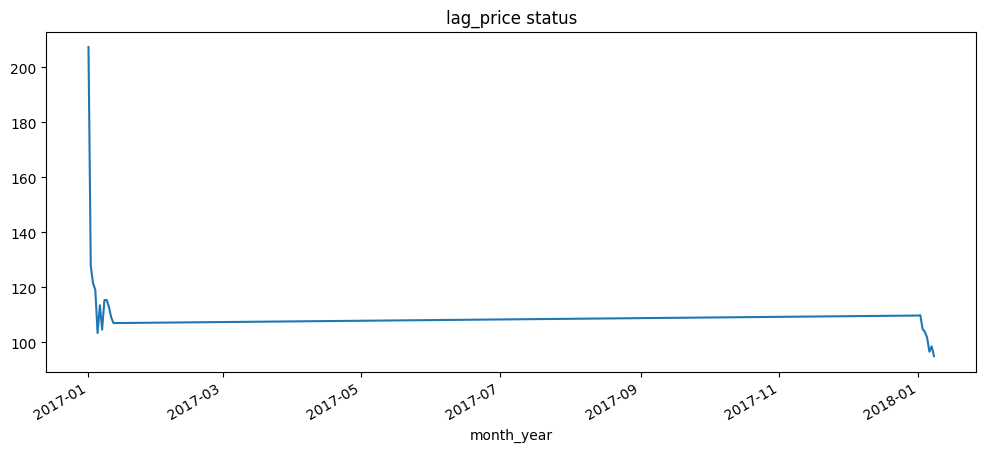

In [38]:
t1 = ds_new.groupby('month_year')['lag_price'].mean()
# here the month_year and mean of lag_price are grouped by using groupby 
# resulting grouped mean values are assigned to the 't1' variable
mp.figure(figsize=(12, 5)) # used to give the figure size
t1.plot(x='month_year') # ploting custgroup by taking x = month_year
mp.title("lag_price status") # title of the graph
mp.show() # to show the graph

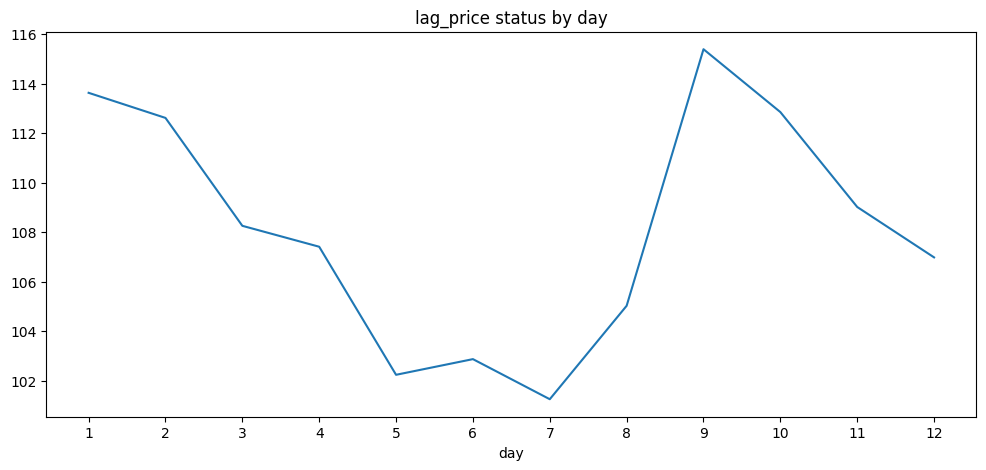

In [39]:
t2 = ds_new.groupby('day')['lag_price'].mean()
# combining the day and mean of lag_price using groupby
# resulting grouped mean values are assigned to the 't2' variable
fig, ax = mp.subplots(figsize=(12, 5)) # to create figure size and axis objects for ploting
ax.set_xticks(range(1, 32)) # it is used to set the x axis ticks for ploting in range from 1 to 31 days
t2.plot(x='day')
mp.title("lag_price status by day")
mp.show()


In [40]:
# removing month_year column
ds_new.drop("month_year",axis=1,inplace=True)

In [41]:
ds_new.columns # month_year is removed

Index(['product_category_name', 'qty', 'total_price', 'freight_price',
       'unit_price', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price', 'day'],
      dtype='object')

In [42]:
# DATA VISUALIZATION

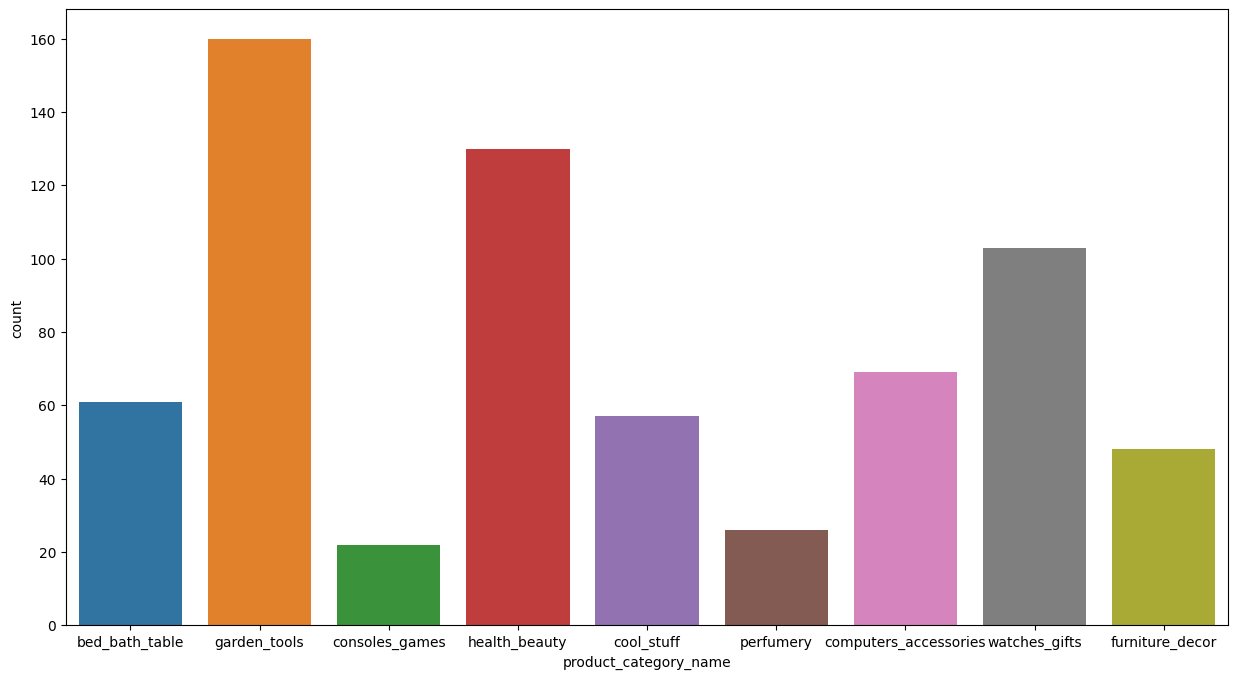

In [43]:
mp.figure(figsize=(15,8))
sb.countplot(data=ds_new, x='product_category_name')
mp.show()

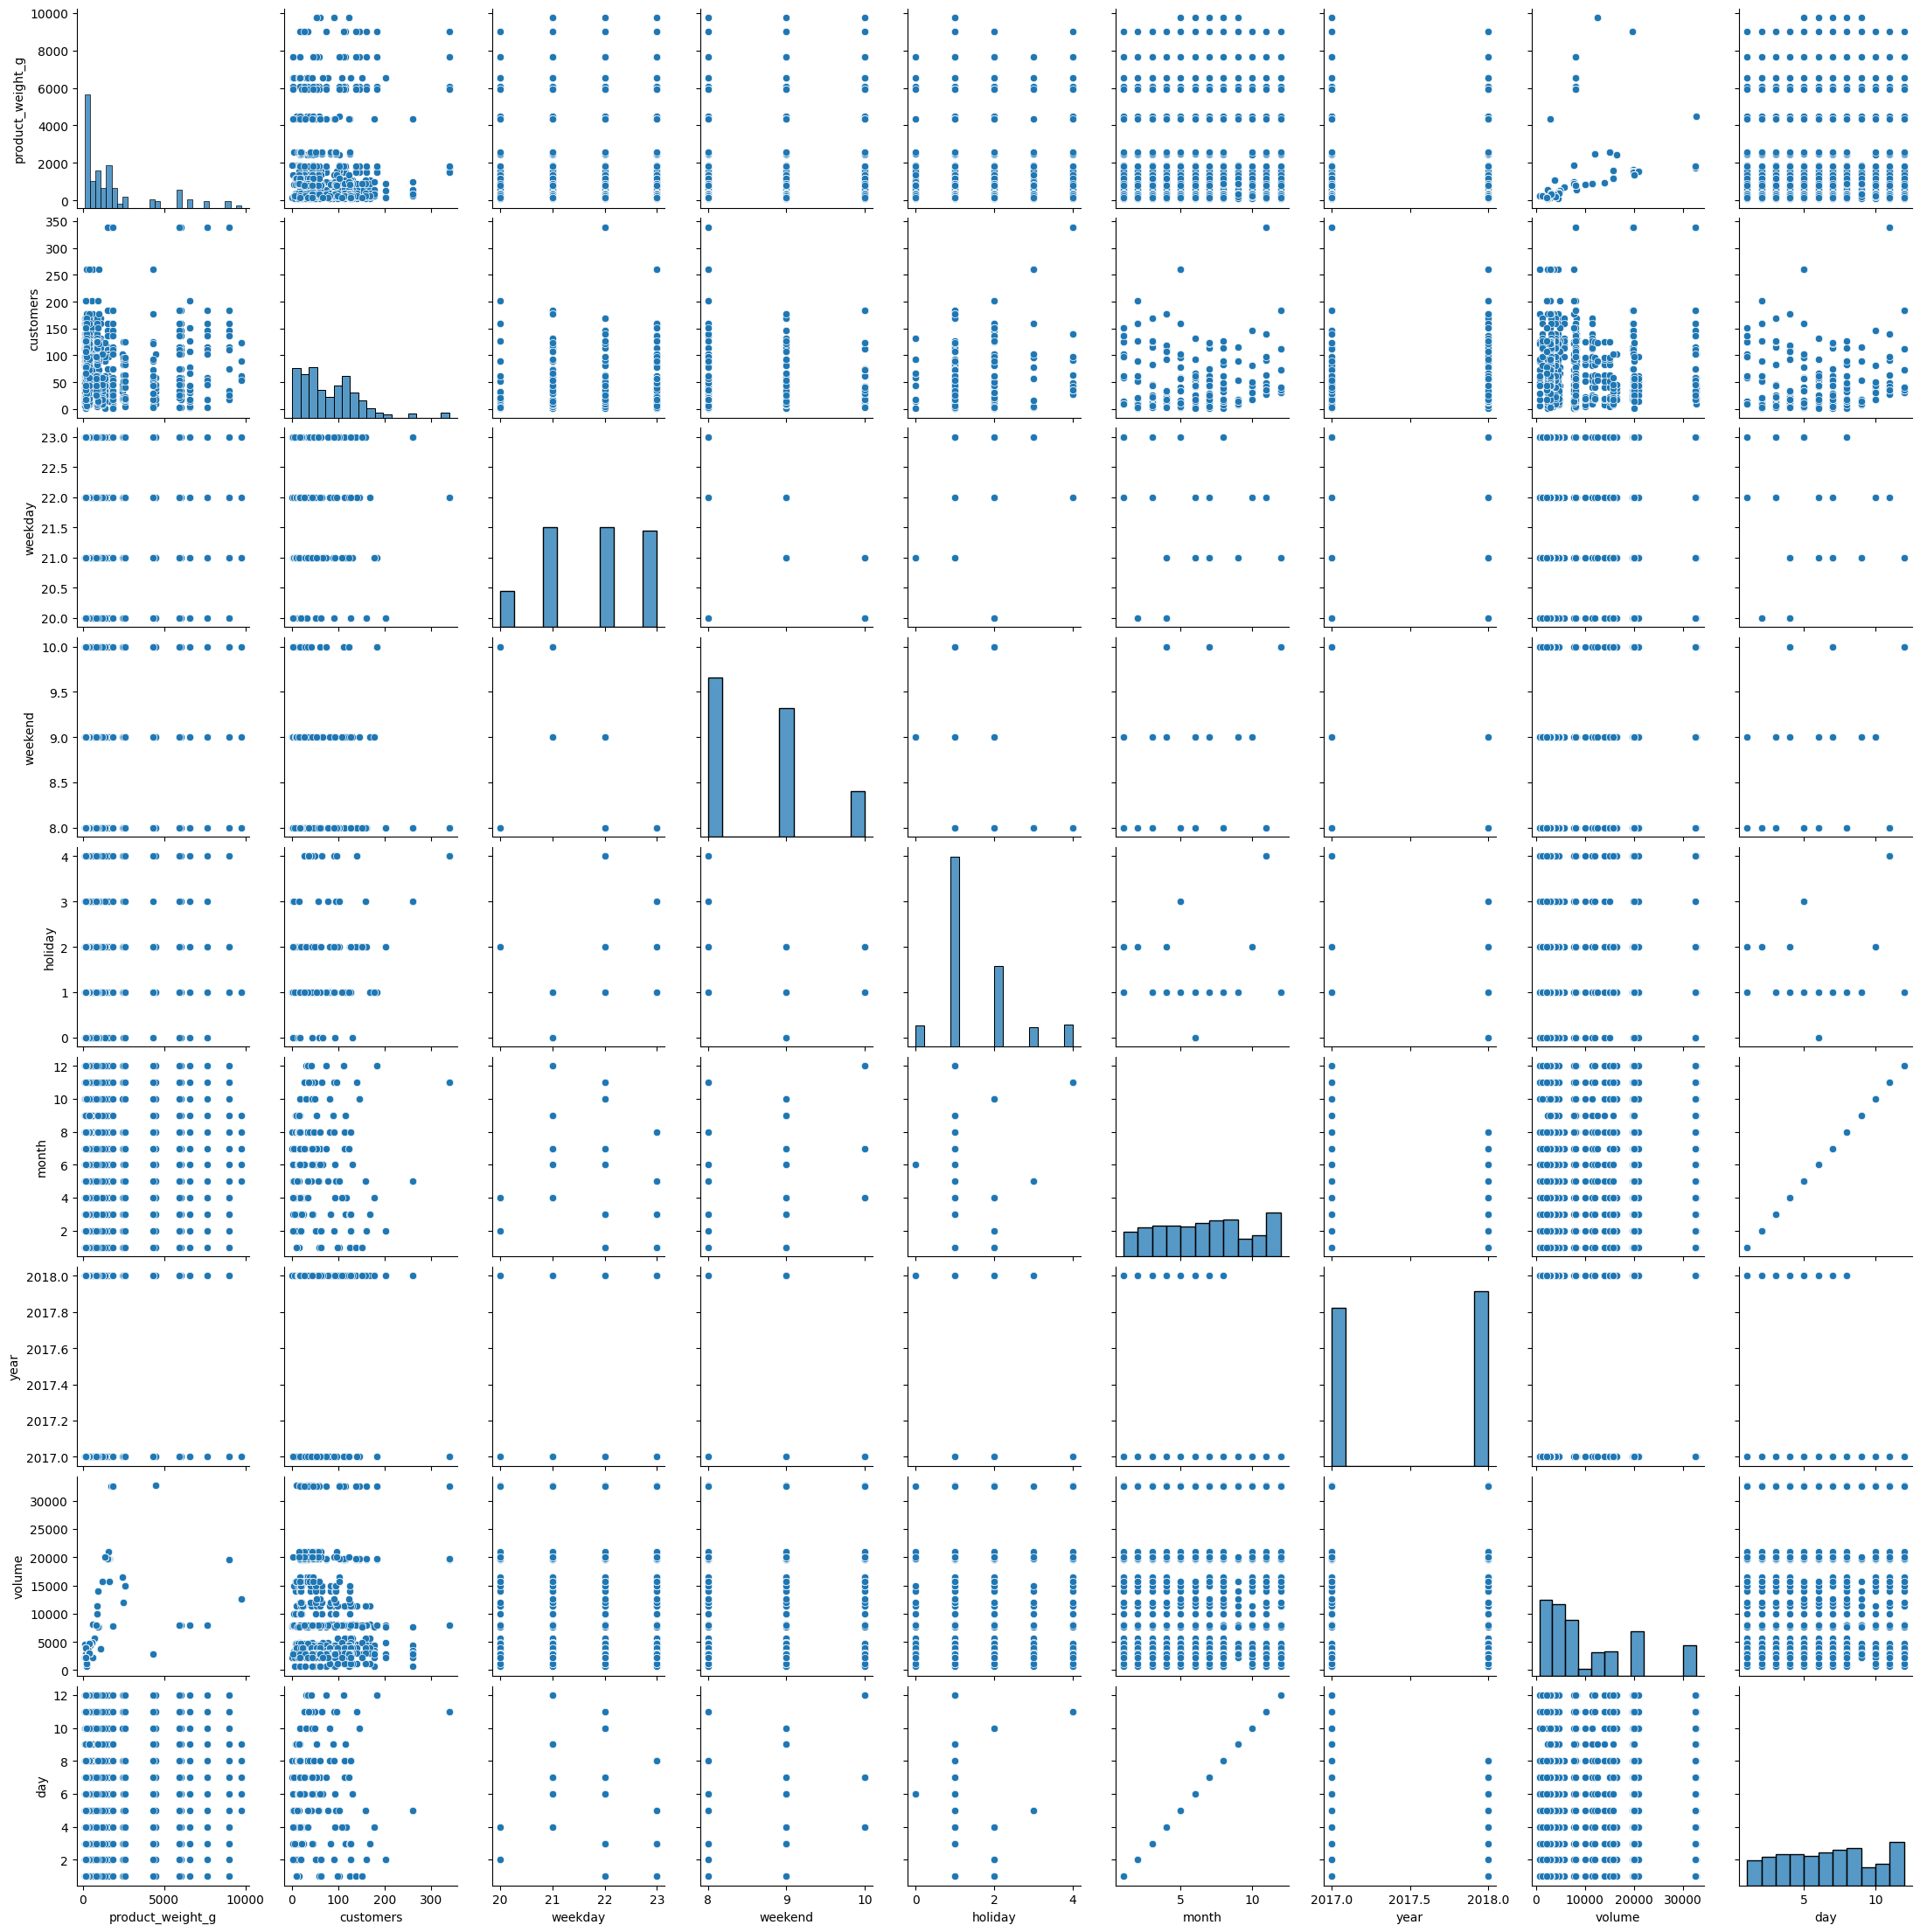

In [44]:
sb.pairplot(ds_new.select_dtypes("int"))

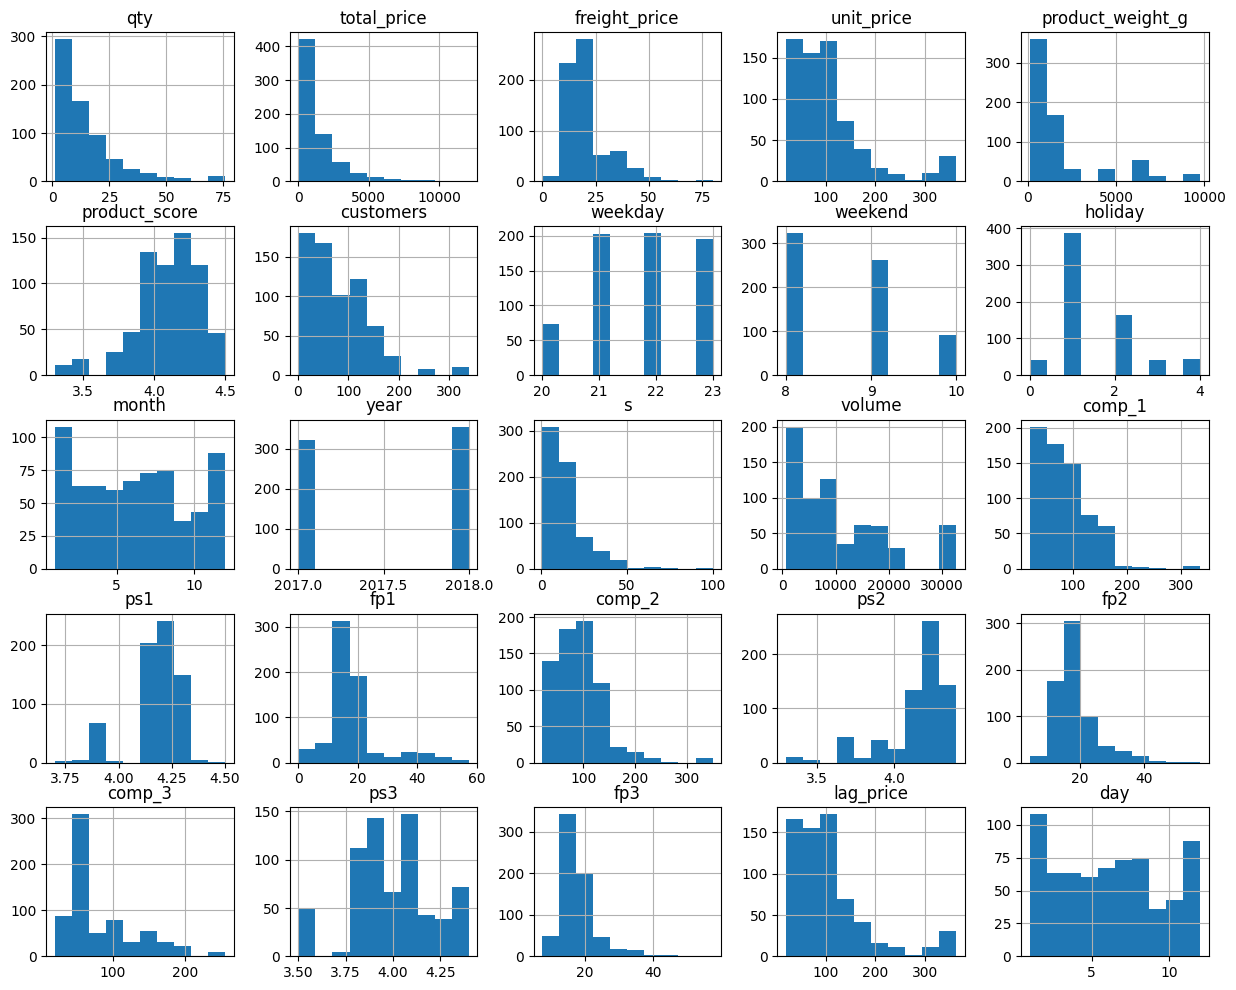

In [45]:
ds_new.hist(figsize=(15,12));

In [46]:
# DATA PREPROCESSING # ENCODING

In [47]:
dms = pd.get_dummies(ds_new["product_category_name"]).astype(int)
# converting the product_category_name into 0 and 1
dms

,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
671,1,0,0,0,0,0,0,0,0
672,1,0,0,0,0,0,0,0,0
673,1,0,0,0,0,0,0,0,0
674,1,0,0,0,0,0,0,0,0


In [48]:
ds_new.drop("product_category_name",axis=1,inplace=True)

In [49]:
ds_new = pd.concat([ds_new,dms],axis=1) # to combine the two data sets or to add new columns

In [50]:
ds_new.columns # new columns added bed_bath_table,computers_accessories,consoles_games,etc...

Index(['qty', 'total_price', 'freight_price', 'unit_price', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'day', 'bed_bath_table',
       'computers_accessories', 'consoles_games', 'cool_stuff',
       'furniture_decor', 'garden_tools', 'health_beauty', 'perfumery',
       'watches_gifts'],
      dtype='object')

In [51]:
# CORELATION ANALYSIS

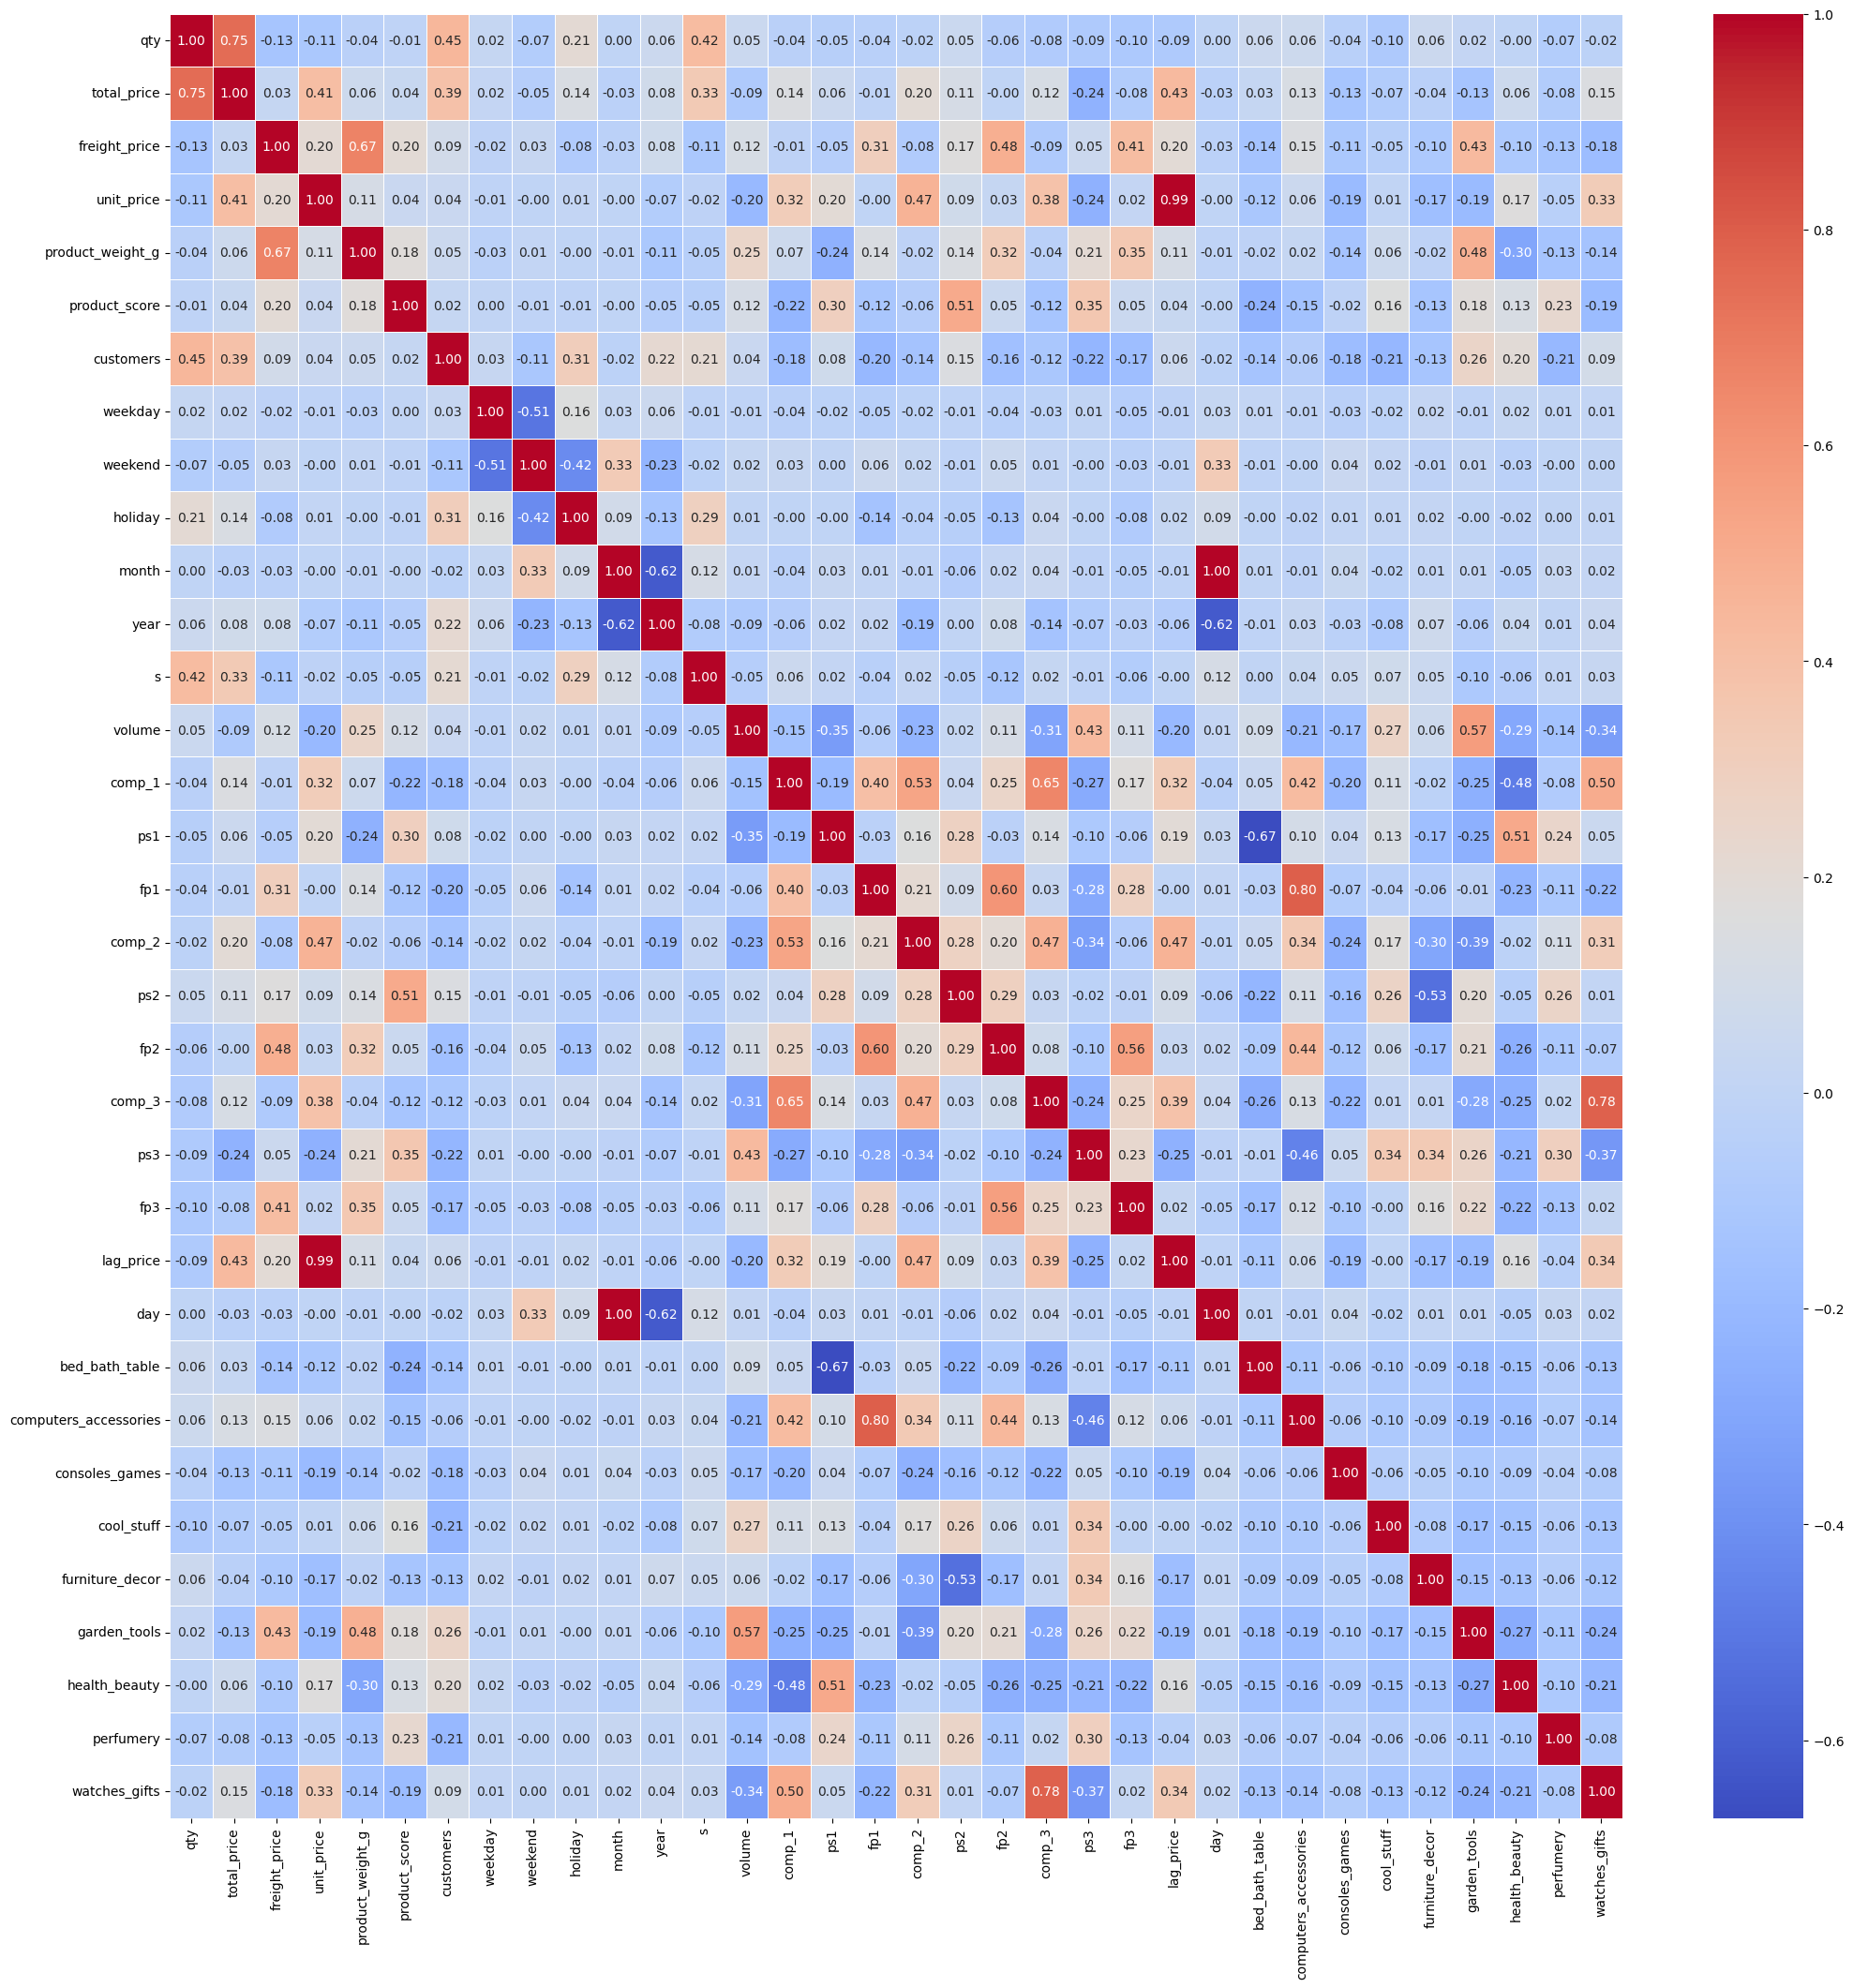

In [52]:
mp.figure(figsize=(25,25))
sb.heatmap(ds_new.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
mp.show() # THERE ARE OUTLIERS IN THIS HEAT MAP
# HERE IN THIS CORELATION WE HAVE OUTLIERS RELATED TO UNIT_PRICE AND DAY

In [53]:
cor = ds_new.corr()["lag_price"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with lag_price":cor.values})

,column,Correlation with lag_price
0,lag_price,1.000000
1,unit_price,0.994453
2,comp_2,0.465271
3,total_price,0.426256
4,comp_3,0.385621
5,watches_gifts,0.335569
6,comp_1,0.320988
7,freight_price,0.201143
8,ps1,0.194805
9,health_beauty,0.156513


In [54]:
ds_new.drop(["unit_price","day"],axis=1,inplace=True)

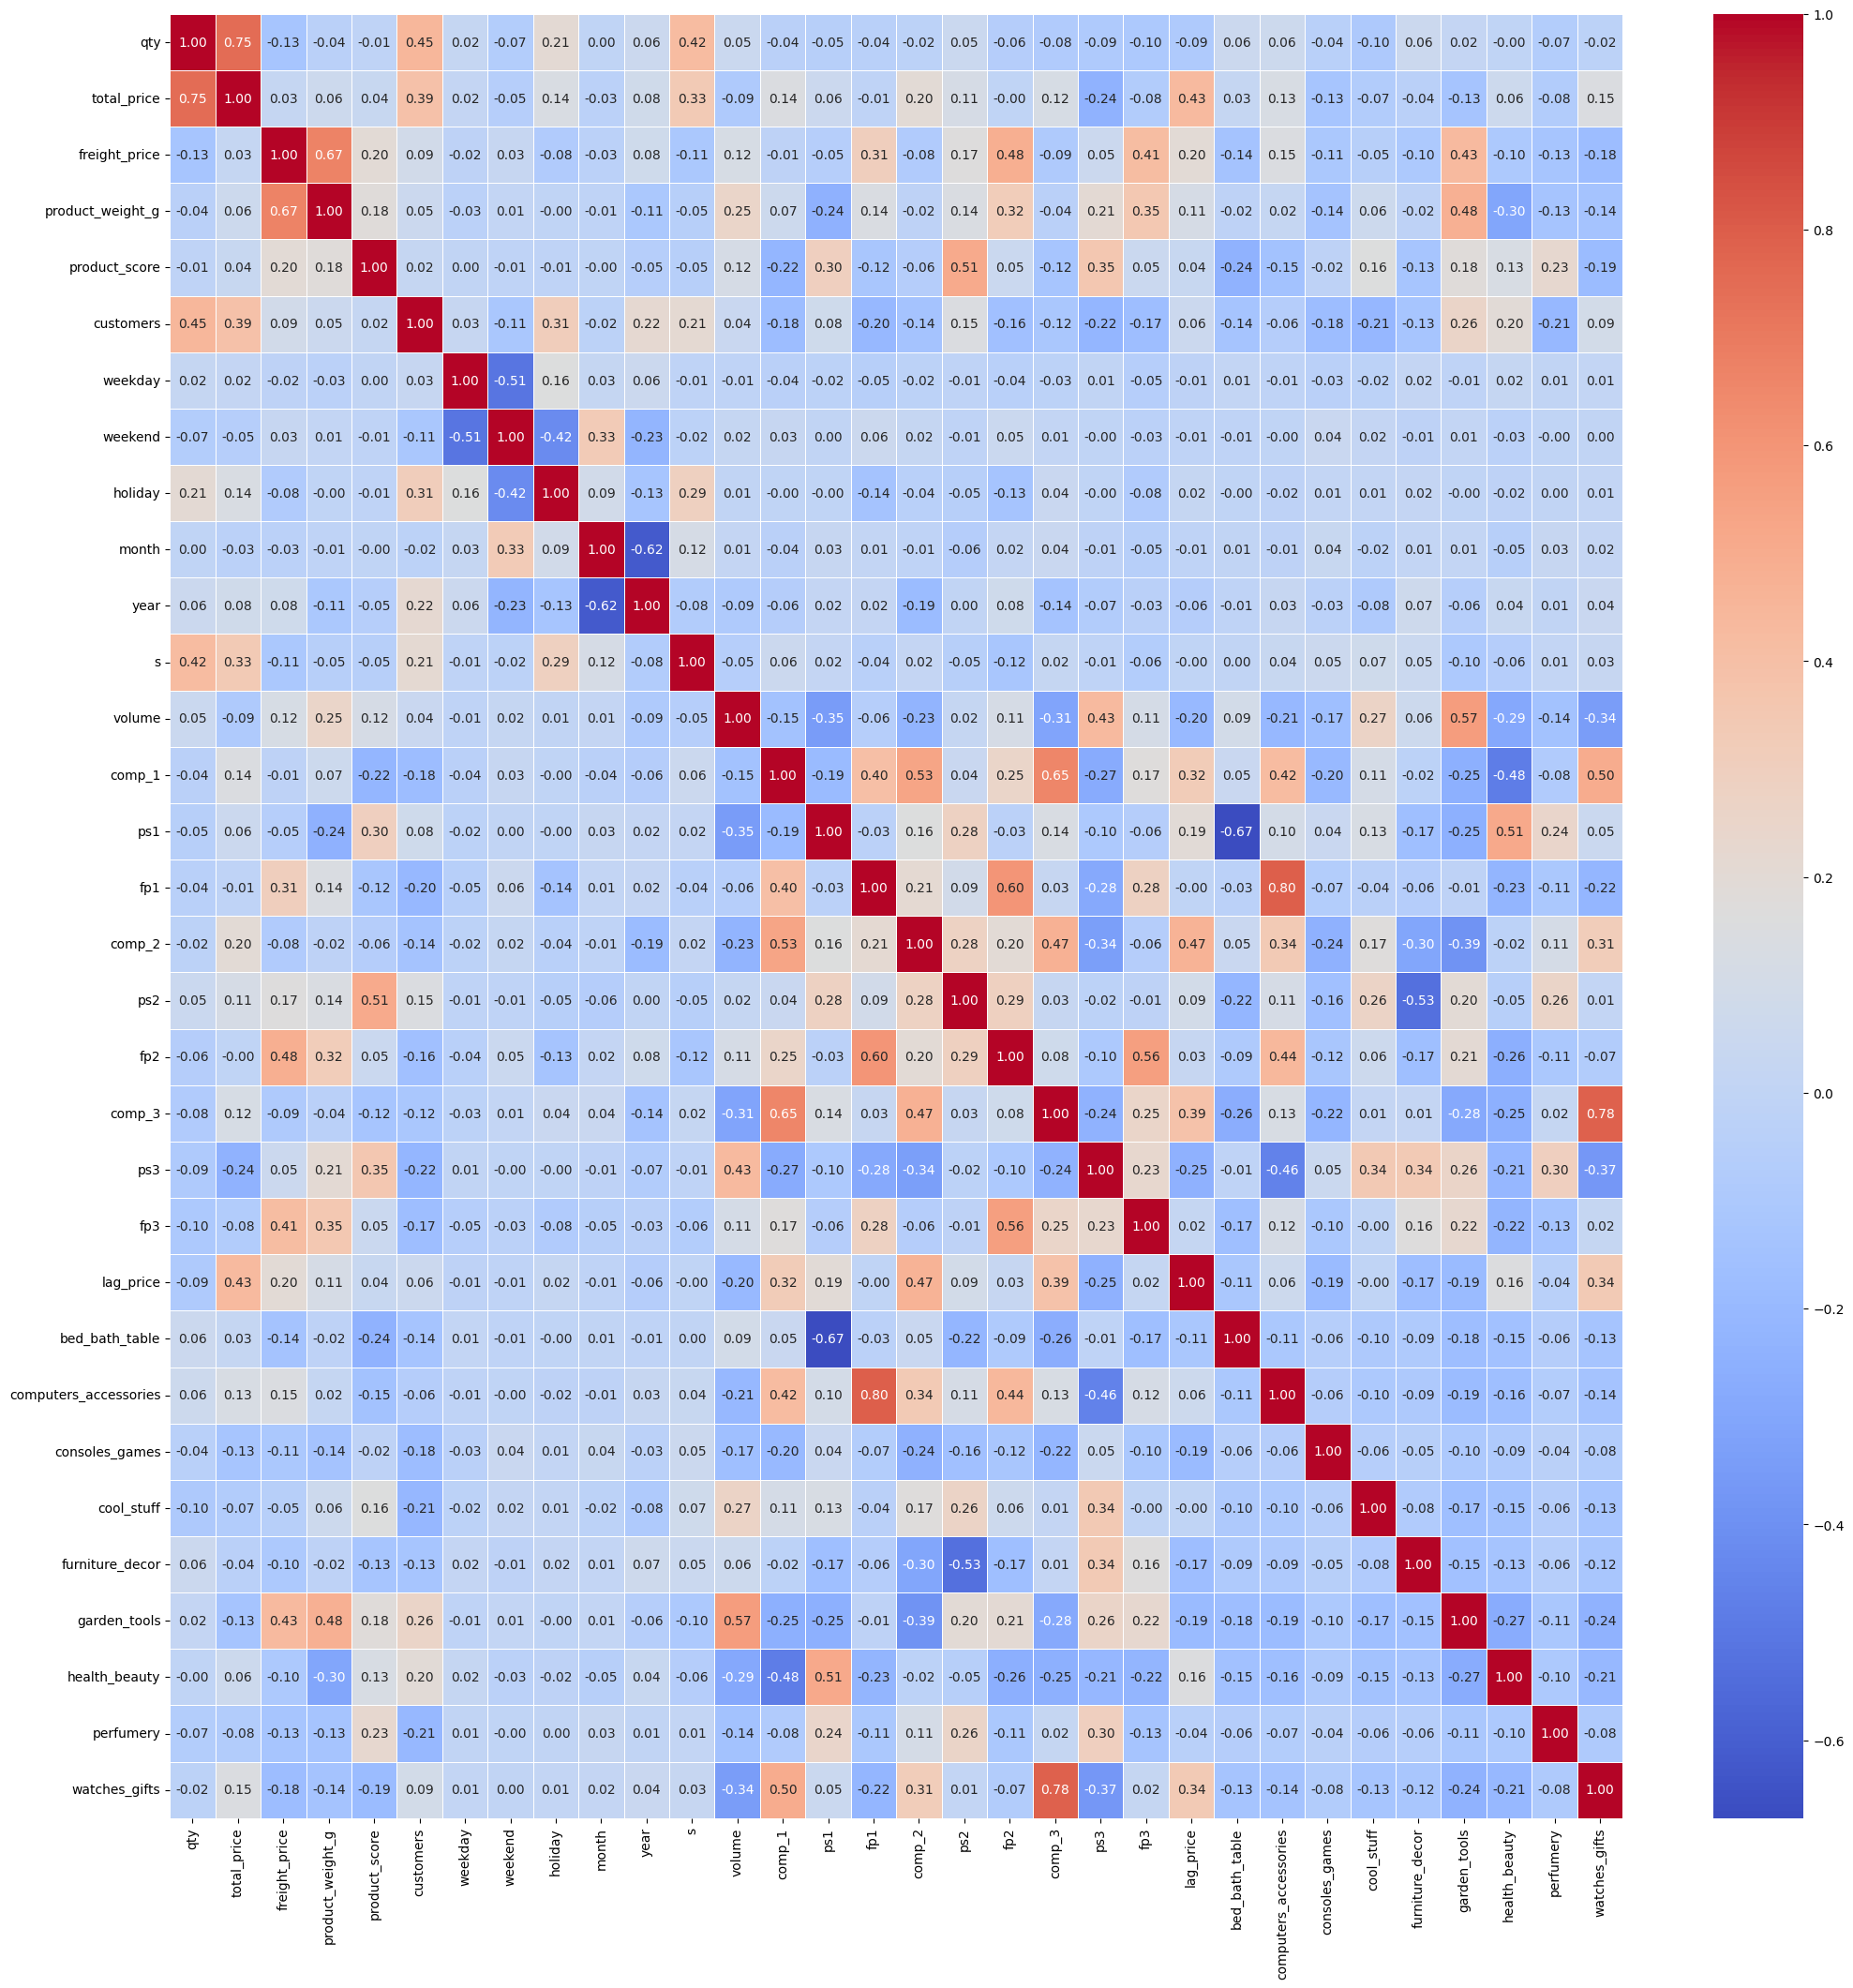

In [55]:
mp.figure(figsize=(25,25))
sb.heatmap(ds_new.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
mp.show() # AFTER REMOVING THE unit_price, day THE OUTLIERS ARE REMOVED

In [56]:
# MODEL BUILDING

In [57]:
x = ds_new.drop("lag_price",axis=1) # selecting independent veriables
y = ds_new["lag_price"] # selecting dependent veriable

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [59]:
# ML MODELS
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
#from sklearn.linear_model import Ridge,Lasso,ElasticNet
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor

In [60]:
#ridge=Ridge().fit(x_train,y_train)
#lasso=Lasso().fit(x_train,y_train)
#enet=ElasticNet().fit(x_train,y_train)
#knn=KNeighborsRegressor().fit(x_train,y_train)
#ada=AdaBoostRegressor().fit(x_train,y_train)
#svm=SVR().fit(x_train,y_train)
#mlpc=MLPRegressor().fit(x_train,y_train)
#dtc=DecisionTreeRegressor().fit(x_train,y_train)
#rf=RandomForestRegressor().fit(x_train,y_train)
xgb=XGBRegressor().fit(x_train,y_train)
#gbm=GradientBoostingRegressor().fit(x_train,y_train)
#lgb=LGBMRegressor().fit(x_train,y_train)
#catbost=CatBoostRegressor().fit(x_train,y_train)

In [83]:
#models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]
#models=[xgb]
#def ML(y,models):
#    accuary=models[].score(x_train,y_train)
#    return accuary

In [109]:
y_pred = xgb.predict(x_test)

In [84]:
acc = xgb.score(x_train,y_train)
acc

0.9999990352195349

In [85]:
#for i in models:
#     print(i,"Algorithm succed rate :",ML("survived",i))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Algorithm succed rate : 0.9999990352195349


In [86]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
ds_new = shuffle(ds_new)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  8.34it/s]

                               Adjusted R-Squared  R-Squared   RMSE   
Model                                                                 
ExtraTreesRegressor                          0.96       0.96  14.85  \
GradientBoostingRegressor                    0.92       0.93  20.16   
HistGradientBoostingRegressor                0.91       0.93  20.71   
XGBRegressor                                 0.90       0.91  22.73   
LGBMRegressor                                0.90       0.91  22.78   
RandomForestRegressor                        0.89       0.91  23.49   
AdaBoostRegressor                            0.85       0.87  27.24   
BaggingRegressor                             0.82       0.84  30.43   
ExtraTreeRegressor                           0.78       0.81  33.54   
DecisionTreeRegressor                        0.67       0.72  40.90   
BayesianRidge                                0.65       0.71  41.74   
RidgeCV                                      0.65       0.71  41.75   
LassoC

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [88]:
pipe = Pipeline([('XGBRegressor',xgb)])

In [89]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('XGBRegressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [99]:
pred = pipe.predict(x_test)

In [108]:
import pickle
with open('retail_price_optimization.pkl', 'wb') as file:
    pickle.dump(pipe,file)